In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [27]:
# Step 1: Generate Synthetic Dataset
# Set a random seed for reproducibility
np.random.seed(42)
# Generate random years of experience from 1 to 20
experience = np.random.randint(1, 21, size=100)
# Generate random education levels: 1 for Bachelor's, 2 for Master's, 3 for PhD
education_level = np.random.choice([1, 2, 3], size=100)

# Generate salary values with some random noise to simulate real-world data
epsilon = np.random.normal(0, 5000, size=100)
# Calculate salary based on experience, education level, and random noise
salary = 30000 + (experience * 2000) + (education_level * 10000) + epsilon

# Create a DataFrame to store the generated data
data = pd.DataFrame({
    'experience': experience,
    'education_level': education_level,
    'salary': salary
})
# Step 2: Data Preprocessing
# Split the dataset into features (experience, education_level) and target (salary)
X = data[['experience', 'education_level']]
y = data['salary']

# Perform an 80/20 split to create training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Step 3: Train the Linear Regression Model
# Initialize the Linear Regression model
model = LinearRegression()
# Train the model using the training data
model.fit(X_train, y_train)

LinearRegression()

Mean Squared Error (MSE): 27136006.68726783
R-squared (R²): 0.867478390418069
Predicted Salary for 7 years of experience and a Master's degree: $65377.80


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Experience vs Salary')

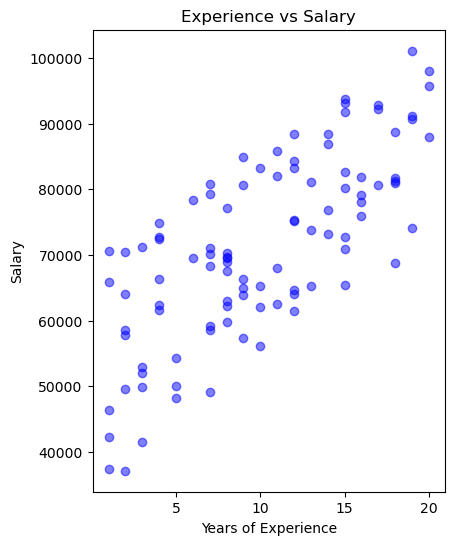

In [31]:
# Step 4: Evaluate the Model
# Predict the salary values for the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared (R^2) values to evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Step 5: Make Predictions
# Predict the salary for a new employee with 7 years of experience and a Master's degree
new_employee = [[7, 2]]  # 7 years of experience and Master's degree
predicted_salary = model.predict(new_employee)
print(f"Predicted Salary for 7 years of experience and a Master's degree: ${predicted_salary[0]:.2f}")

# Step 6: Visualizations (Optional)
# Create a figure to visualize the relationships between features and salary
plt.figure(figsize=(10, 6))

# Scatter plot for experience vs salary
plt.subplot(1, 2, 1)
plt.scatter(data['experience'], data['salary'], color='blue', alpha=0.5)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Experience vs Salary')

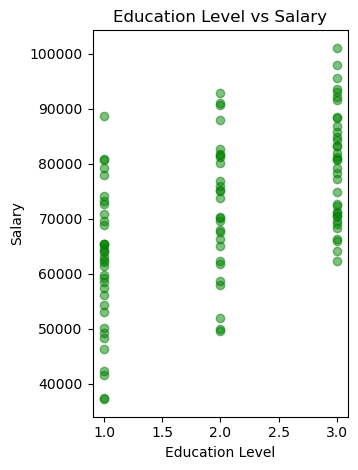

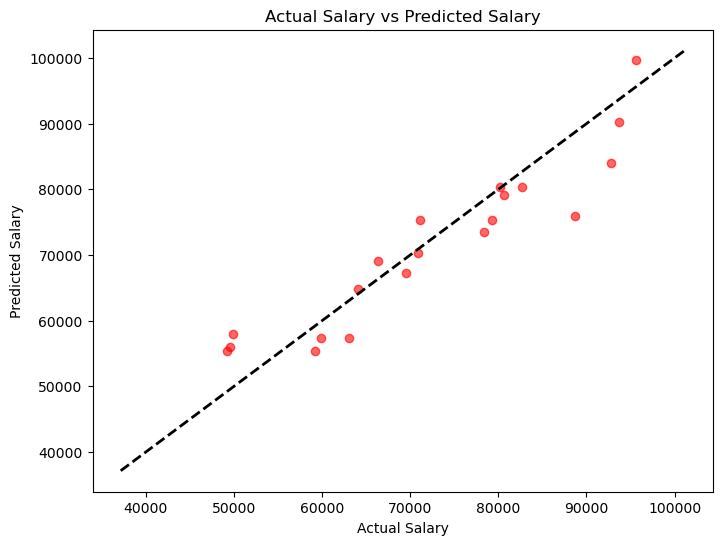

In [33]:
# Scatter plot for education_level vs salary
plt.subplot(1, 2, 2)
plt.scatter(data['education_level'], data['salary'], color='green', alpha=0.5)
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.title('Education Level vs Salary')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Plot model's predictions vs actual salary data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='red', alpha=0.6)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual Salary vs Predicted Salary')
# Plot a reference line for perfect predictions
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='black', linestyle='--', linewidth=2)
plt.show()
